# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [381]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/mouse_metadata.csv"
study_results_path = "data/study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
complete_data = pd.merge(study_results,mouse_metadata, on = "Mouse ID")

# Display the data table for preview
complete_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [382]:
# Checking the number of mice.
mice_quantity = complete_data["Mouse ID"].nunique()
mice_quantity

249

In [383]:
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicates = complete_data[complete_data.duplicated(subset=['Mouse ID', 'Timepoint'])]["Mouse ID"].unique()
duplicates

array(['g989'], dtype=object)

In [384]:
# Optional: Get all the data for the duplicate mouse ID.
# Filter rows where Mouse ID is 'g989'
duplicates_mouse_g989 = complete_data[complete_data['Mouse ID'] == 'g989']

# Show the details of these rows
duplicates_mouse_g989

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [385]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
complete_data_cleaned = complete_data[complete_data['Mouse ID'] != 'g989']
complete_data_cleaned.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [386]:
# Checking the number of mice in the clean DataFrame.
mice_quantity_cleaned = complete_data_cleaned["Mouse ID"].nunique()
mice_quantity_cleaned

248

## Summary Statistics

In [387]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
tumor_regimen = complete_data_cleaned.groupby('Drug Regimen')['Tumor Volume (mm3)']

# mean, median, variance, standard deviation, and SEM of the tumor volume.
mean = tumor_regimen.mean()
median = tumor_regimen.median()
variance = tumor_regimen.var()
std_dev = tumor_regimen.std()
std_err = tumor_regimen.sem()

# Assemble the resulting series into a single summary DataFrame.
summary_stats = pd.DataFrame({
    'Mean Tumor Volume': mean,
    'Median Tumor Volume': median,
    'Tumor Volume Variance': variance,
    'Tumor Volume Std. Dev.': std_dev,
    'Tumor Volume Std. Err.': std_err
})

summary_stats

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [388]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_stats_new = complete_data_cleaned.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg([
    'mean', 'median', 'var', 'std', 'sem'])

summary_stats_new

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

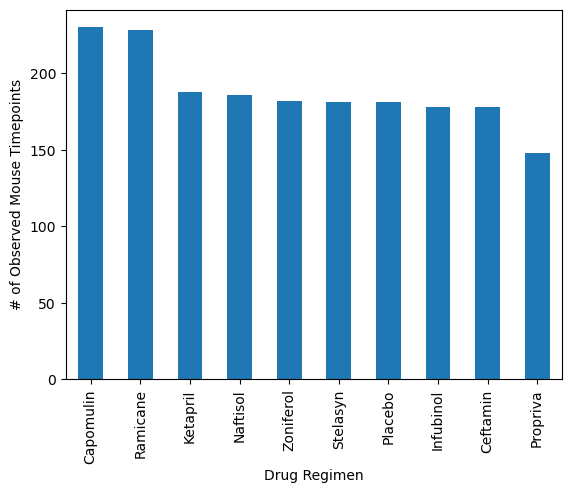

In [389]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
regimen_timepoints = complete_data_cleaned['Drug Regimen'].value_counts()

regimen_timepoints.plot(kind='bar',)
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.show()

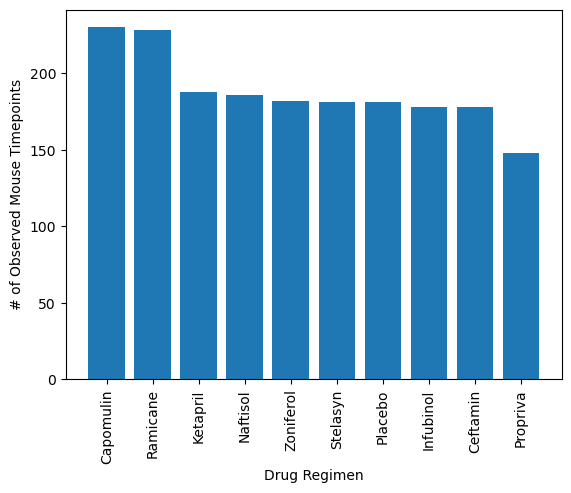

In [390]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
plt.bar(regimen_timepoints.index, regimen_timepoints.values)

plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.xticks(rotation='vertical')

plt.show()

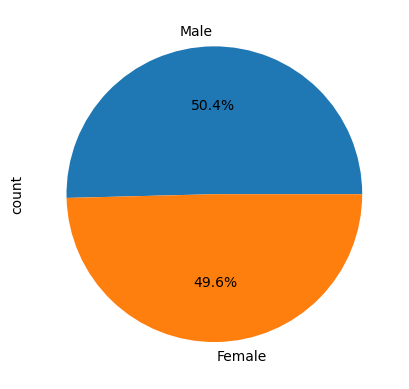

In [391]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
mice_gender = complete_data_cleaned.groupby('Mouse ID')['Sex'].first().value_counts()

# Make the pie chart
mice_gender.plot(kind='pie', autopct='%1.1f%%')
plt.show()

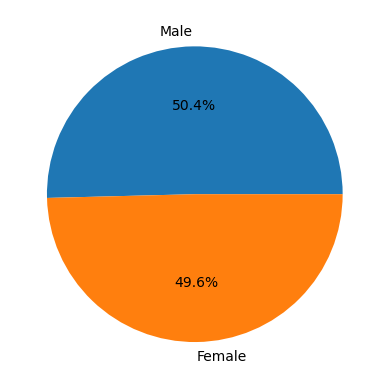

In [392]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study

# Make the pie chart
plt.pie(mice_gender, labels=mice_gender.index, autopct='%1.1f%%')
plt.show()

## Quartiles, Outliers and Boxplots

In [393]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# # Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
greatest_timepoint = complete_data_cleaned.groupby('Mouse ID')['Timepoint'].max()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_df = pd.merge(greatest_timepoint, complete_data_cleaned, on=['Mouse ID', 'Timepoint'])

last_tumor_data = merged_df[merged_df['Drug Regimen'].isin(['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])]

last_tumor_data[['Mouse ID', 'Drug Regimen', 'Tumor Volume (mm3)', 'Timepoint']].head()

,Mouse ID,Drug Regimen,Tumor Volume (mm3),Timepoint
0,a203,Infubinol,67.973419,45
1,a251,Infubinol,65.525743,45
3,a275,Ceftamin,62.999356,45
6,a411,Ramicane,38.407618,45
7,a444,Ramicane,43.047543,45


In [394]:
# Put treatments into a list for for loop (and later for plot labels)
four_treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_volume = []

# Create a for loop to go through each of the treatments
for treatment in four_treatments:

    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_volumes = last_tumor_data.loc[last_tumor_data['Drug Regimen'] == treatment, 'Tumor Volume (mm3)']

    # Add the tumor data to the list
    tumor_volume.append(tumor_volumes)

    # Calculate the IQR and quantitatively determine if there are any potential outliers.
    quartiles = tumor_volumes.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq

    lower_bound = lowerq - 1.5*iqr
    upper_bound = upperq + 1.5*iqr

    # Determine outliers using upper and lower bounds
    outliers = tumor_volumes[(tumor_volumes < lower_bound) | (tumor_volumes > upper_bound)]
    
    print(f"{treatment}'s potential outliers: {outliers}")

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


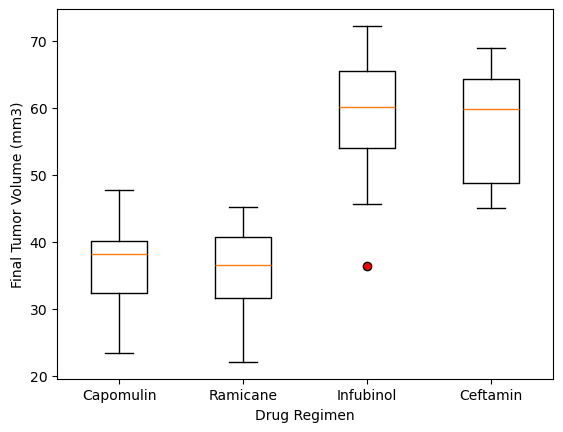

In [395]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
plt.boxplot(tumor_volume, tick_labels=four_treatments, 
            flierprops=dict(marker = 'o', markerfacecolor='red'))
plt.ylabel('Final Tumor Volume (mm3)')
plt.xlabel('Drug Regimen')

plt.show()

## Line and Scatter Plots

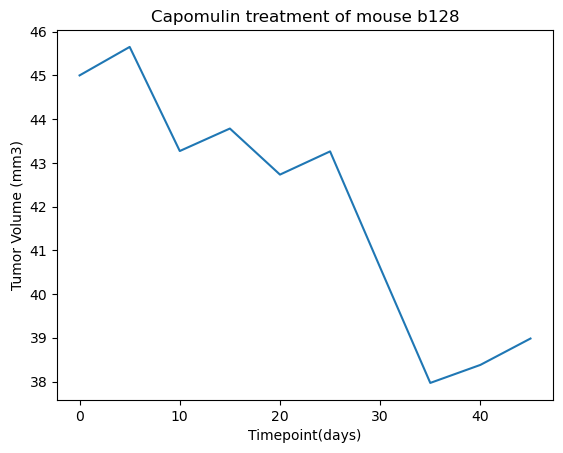

In [396]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin_data = complete_data_cleaned[complete_data_cleaned['Drug Regimen'] == 'Capomulin']
mouse_id = 'b128'

mouse_data = capomulin_data[capomulin_data['Mouse ID'] == 'b128']

plt.plot(mouse_data['Timepoint'], mouse_data['Tumor Volume (mm3)'])

plt.xlabel('Timepoint(days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Capomulin treatment of mouse b128')
plt.show()


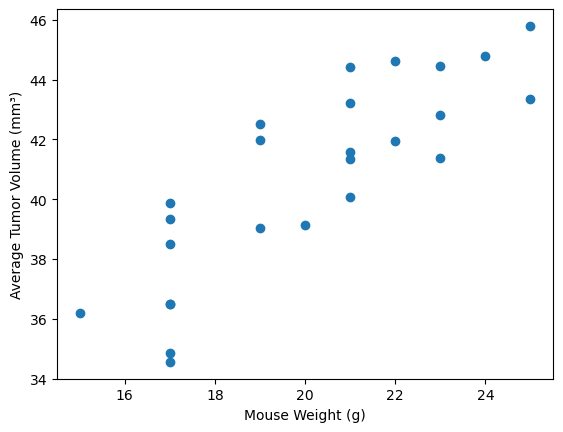

In [397]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
avg_tumor_vol = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()
mouse_weights = capomulin_data.groupby('Mouse ID')['Weight (g)'].first()

plt.scatter(mouse_weights, avg_tumor_vol)

plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm³)')

plt.show()

## Correlation and Regression

The correlation between bmouse weight and the average tumor volume is 0.84


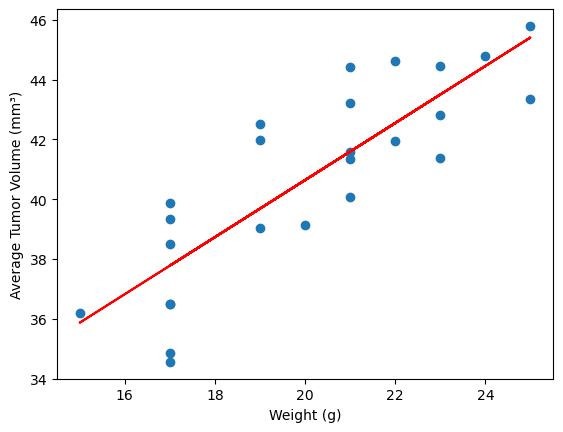

In [398]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
correlation = st.pearsonr(mouse_weights,avg_tumor_vol)

plt.scatter(mouse_weights, avg_tumor_vol)
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm³)')

# Perform linear regression to get the line of best fit
slope, intercept, r_value, p_value, std_err = st.linregress(mouse_weights, avg_tumor_vol)

# Add regression line
plt.plot(mouse_weights, slope * mouse_weights + intercept, color='red')

print(f"The correlation between bmouse weight and the average tumor volume is {round(correlation[0],2)}")
plt.show()
